# Coordinates, Projections, and Grids

## Synopisis

## Coordinate systems

A coordinate system allows us to (uniquely) specify points in space. You should be familiar with the Cartesian 2d coordinate system where, by convention, (x,y) are the normal distances, measured in the same units, from two perpendicular lines through the origin.

We live in a 3d world (referring to spatial dimensions) and so require 3 numerical values to label a point in space. In Cartesian coordinates they might be (x,y,z) referenced to the center of the Earth, with z being height above the equatorial plane (positive in the direction of the North pole), y being the distance from a plane through the poles and a reference meridian, and x the distance from the plane perpendicular to both other planes. The equations of motion used by many models are often derived starting in this Cartesian coordinate system. However, these Cartesian coordinates are inconvenient to use in practice because we live on the surface of a sphere and "up", as defined by gravity, is sometimes increasing z (at the North Pole), and sometimes changing x or y (at the Equator).

### Spherical coordinates

In ESMs we therefore use spherical coordinates, $\lambda$, $\phi$ and $r$, where $\lambda$ is "longitude", a rotation angle eastward around the poles starting at a reference meridian; $\phi$ is "latitude", an elevation angle from the Equatorial plane (positive in Northern hemisphere), and $r$ is the radial distance from the center of the Earth. $\lambda,\phi,r$ are related to Cartesian $x,y,z$ by some simple relations:

$$
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix} =
\begin{pmatrix}
r \cos \phi \cos \lambda \\ r \cos \phi \sin \lambda \\ r \sin \phi
\end{pmatrix}
$$

Note that $r, x, y, z$ are all in the same units (eg. kilometets or meters) and $\lambda,\phi$ are angles usually given in degrees or radians.

Coordinate singularities:At the North and South poles of the coordinate system, $\phi = \pm \pi/2 = \pm 90^\circ$, all values of longitude refer to the same point. There is no "east" when you are positioned at the pole. This has many consequences, but one of the more fundamental is that spherical coordinates are not a good coordinate to use to design a discretization of the spherical domain.

Periodic coordinates: While a tuple of longitude, latitude and radius unambiguously define a point in space, given a point in space you there are multiple valid longitudes that refer to the same point. Longitude is cyclic ($\pm360^\circ$ is equivalent to $0^\circ$). This can cause problems in practice, particularly for plotting spherical data for which effort is sometimes needed to handle the periodicity.

### Geographic coordinates

We live on the surface of the Earth and to precisely refer to points near the Earth's surface requires a properly defined geographic coordinate system. A common choice of coordinates is latitude, longitude and altitude, where altitude is height above a particular surface. Unfortunately the Earth is not spherical and that reference surface is better approximated as an ellipsoidal.

In order to be unambiguous about the definition of coordinates, map-makers choose a reference ellipse with a agreed upon scale and orientation. They then choose the most appropriate mapping of the spherical coordinate system onto that ellipsoid, called a _geodetic datum_. A widely used global datum includes the [World Geodetic System](https://en.wikipedia.org/wiki/World_Geodetic_System) (WGS 84), the default datum used for the Global Positioning System. When you are given a latitude-longitude pair of values, strictly speaking without the geodetic datum, the is some ambiguity about the actual physical point being referred to. For ESMs, the datum is rarely provided and this is because ESMs almost universally approximate the Earth as a sphere and use spherical coordinates for referencing locations. This means some approximation is required when comparing real-world positions and model positions.

The latitude and longitude using these horizontal datums are the spherical coordinates of the point on an ellipse. It you draw a straight line from the point on the ellipsoidal to the center, if passes through all spheres co-centered with the same latitude and longitude.

Different datum have different reference points and scales, and so longitude and latitude can differ between geodetic datum.

## Projections

To view data covering the surface of a sphere, or the Earth, we have to project that 3d surface into 2d. Imagine peeling the rind off an orange in one piece and then trying to flatten it onto a table top; the curvature in the peel requires you to distort the rind or make cuts, in order to flatten it fully. This is the function of the map projections and distortion is inevitable. Some projection preserve properties such as relative angles between lines, or relative area, but there is no projection of the surface of the sphere that can avoid distortion of some form.

A projection maps the longitude and latitude of spherical coordinates into a new coordinate system. Very confusingly, sometimes the projection coordinates will be called longitude and latitude too! The projection coordinates are meaningless unless you know what the projection is so you often find a reference to the projection in the meta-data of coordinates; it means the longitude and latitude are not spherical coordinate but projection coordinates.

In [1]:
import cartopy
import numpy
import matplotlib.pyplot as plt

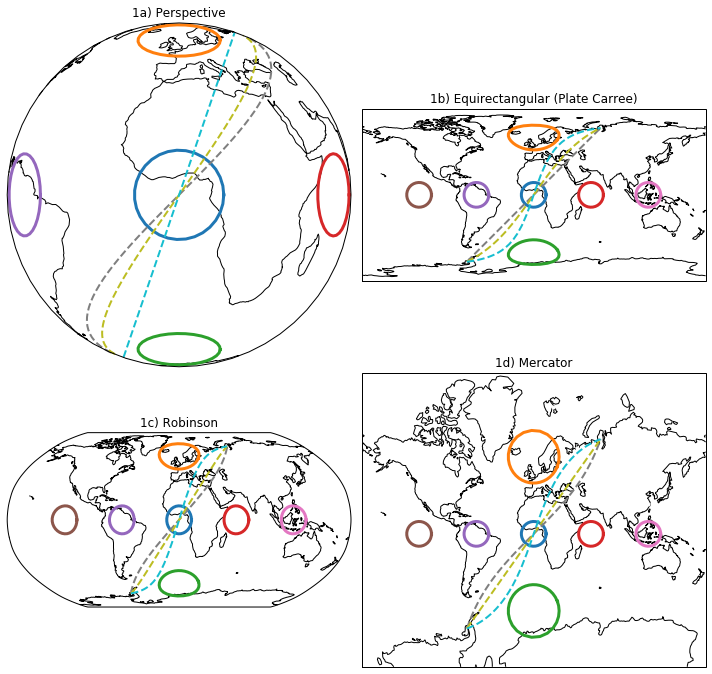

In [3]:
def xyz2ll(x,y,z):
    i_r = 1/numpy.sqrt(x*x + y*y + z*z)
    sinlat = z*i_r
    recip_coslat = 1/numpy.sqrt(1 - sinlat**2)
    sinlon = (y*i_r)*recip_coslat
    coslon = (x*i_r)*recip_coslat
    rad2deg = 180/numpy.pi
    lat = numpy.arcsin(sinlat)*rad2deg
    sgn = numpy.maximum(numpy.sign(coslon),0)
    lon0 = numpy.arcsin(sinlon)*rad2deg
    lon1 = 180-numpy.arcsin(sinlon)*rad2deg
    return (1-sgn)*lon1+sgn*lon0,lat
def ll2xyz(lon,lat):
    deg2rad = numpy.pi/180
    coslat = numpy.cos(deg2rad*lat)
    return coslat*numpy.cos(deg2rad*lon), coslat*numpy.sin(deg2rad*lon), numpy.sin(deg2rad*lat)
def roty(x,y,z,a):
    deg2rad = numpy.pi/180
    ca,sa = numpy.cos(deg2rad*a), numpy.sin(deg2rad*a)
    return ca*x-sa*z,y,ca*z+sa*x
def rotz(x,y,z,a):
    deg2rad = numpy.pi/180
    ca,sa = numpy.cos(deg2rad*a), numpy.sin(deg2rad*a)
    return ca*x-sa*y,ca*y+sa*x,z
def drw_circles(subplot, projection, w=0.23, lw=3):
    a = numpy.linspace(0,2*numpy.pi,32)
    x,y,z=1,w*numpy.cos(a),w*numpy.sin(a)
    ax=plt.subplot(subplot, projection=projection)
    ax.plot(*xyz2ll(x,y,z),transform=cartopy.crs.PlateCarree(),linewidth=lw)
    ax.plot(*xyz2ll(*roty(x,y,z,60)),transform=cartopy.crs.PlateCarree(),linewidth=lw)
    ax.plot(*xyz2ll(*roty(x,y,z,-60)),transform=cartopy.crs.PlateCarree(),linewidth=lw)
    ax.plot(*xyz2ll(*rotz(x,y,z,60)),transform=cartopy.crs.PlateCarree(),linewidth=lw)
    ax.plot(*xyz2ll(*rotz(x,y,z,-60)),transform=cartopy.crs.PlateCarree(),linewidth=lw)
    ax.plot(*xyz2ll(*rotz(x,y,z,-120)),transform=cartopy.crs.PlateCarree(),linewidth=lw)
    ax.plot(*xyz2ll(*rotz(x,y,z,120)),transform=cartopy.crs.PlateCarree(),linewidth=lw)
    ax.plot([-180,180,0,0],[0,0,89,-89],'w.',transform=cartopy.crs.PlateCarree())
    drw_lines(ax)
    ax.coastlines()
def drw_lines(ax, lon0=-70, lat0=-70, lon1=70, lat1=70, lw=2, ls='--', np=64):
    # Straight line in lat-lon space
    lons, lats = numpy.linspace(lon0, lon1, np), numpy.linspace(lat0, lat1, np)
    ax.plot(lons,lats,ls,transform=cartopy.crs.PlateCarree(),linewidth=lw)
    # Straight line in Mercator
    x0,y0 = cartopy.crs.Mercator().transform_point(lon0,lat0,cartopy.crs.PlateCarree())
    x1,y1 = cartopy.crs.Mercator().transform_point(lon1,lat1,cartopy.crs.PlateCarree())
    xs, ys = numpy.linspace(x0, x1, np), numpy.linspace(y0, y1, np)
    ax.plot(xs,ys,ls,transform=cartopy.crs.Mercator(),linewidth=lw)
    # Straight line in NearsidePerspective
    x0,y0,z0 = ll2xyz(lon0,lat0)
    x1,y1,z1 = ll2xyz(lon1,lat1)
    a = numpy.linspace(0,1,np)
    lons,lats = xyz2ll(x0 + (x1-x0)*a, y0 + (y1-y0)*a, z0 + (z1-z0)*a)
    ax.plot(lons,lats,ls,transform=cartopy.crs.PlateCarree(),linewidth=lw)
plt.figure(figsize=(10,10))
drw_circles(221, cartopy.crs.NearsidePerspective() ); plt.title('1a) Perspective')
drw_circles(222, cartopy.crs.PlateCarree() ); plt.title('1b) Equirectangular (Plate Carree)')
drw_circles(223, cartopy.crs.Robinson() ); plt.title('1c) Robinson')
drw_circles(224, cartopy.crs.Mercator() ); plt.title('1d) Mercator')
plt.tight_layout()

Figure 1: The colored circles in these plots are circles in the tangent plane to the sphere and projected onto the surface. The various projections can distort the circles. The circles are separated zonally or meridionally by 60$^\circ$. In 1a, a perspective image of the sphere, the circles appear non-circular because of the viewing angle. The blue circle appears circular because we are viewing it from directly overhead. The projection in 1b is the easy to use Plate-Caree projection, a "lat-lon" plot, in which circles are stretched zonally with distance from the equator. 1d shows the Mercator projection in which circles remain circles but are expanded in size away from th equator. 1c shows the Robinson projection which compromises between the two. The purple dashed lines is a straight line in latitude-longitude coordinates, and the yellow dashed line is a straight line in the Mercator coordinates. The cyan dashed line is a great arc, and is straight in the perspective view because we are viewing it from directly overhead.

The two most useful projections are the equirectangular and Mercator projections.

### Equirectangular projection

This is the simplest projection, sometimes thought of a non-projection which is incorrect. In general it takes the form
$$
\begin{align}
x & = R \left( \lambda - \lambda_0 \right) \cos \phi_0 \\
y & = R \left( \phi - \phi_0 \right)
\end{align}
$$

The origin of the plot, $(x,y)=(0,0)$ corresponds to $(\lambda,\phi)=(\lambda_0,\phi_0)$. The $\cos \phi_0$ term is a constant and the most common choice of $\phi_0=0$ gives the plate carrée projection, which means "flat square" in French. In this case, the projection is simply
$$
\begin{align}
x & = R \left( \lambda - \lambda_0 \right) \\
y & = R \phi
\end{align}
$$

Distances in the y-direction are proportional to the meridional direction on the sphere, but the x-direction are stretched zonally, more so further from the equator. This is apparent in the orange and green circles in figure 1b, where the heights or the loops are the same as circles on the equator but the width is markedly increased.

### Mercator projection

The Mercator projection has the same stretching in the x-direction as the equirectangular but in order to preserve shape, it also stretches the y direction so the infinitesimal elements are stretched isotropically (the y-stretching is equal to the x-stretching). At the polar singularities, the x-stretching is infinite so y becomes infinite and the Mercator projection can never show the poles.

$$
\begin{align}
x & = R \left( \lambda - \lambda_0 \right) \cos \phi_0 \\
y & = R \ln \left( \tan \left( \frac{\pi}{4} + \frac{\phi}{2} \right) \right)
\end{align}
$$


### Lines

A length of a line between two points is a function of the path taken. On the surface of sphere, the shortest path between two given points is a great arc. A great arc does not appear straight in many projections. Unfortunately, many grid calculations use a great arc for the length of a line between nodes on a model grid, which can be inconsistent with the constraints or assumptions about the grid.

The dashed curves in figure 1 "straight" lines between two points in various projections. The cyan dashed curve is a great arc. The purple dashed curve is a straight line in the Plate-Carree projection (latitude-longitude space) and the yellow dashed curve is a straight line in the Mercator projection. All are curved in most other projections. To describe a straight line in some projection then _the projection must be known_, irrespective of the coordinate system defining the end points. That is, we can define the end points of the line in latitude-longitude coordinates but say a line is straight in the Mercator projection, and by so doing unambiguously define that line.

## ESM grids

Many ESMs use quadrilateral grids to discretize the surface of the sphere. The following discussion also applies to fully unstructured grids built from polygons but here we use quadrilateral grids for simplicity. There are also grids that have cuts and joins but here we'll stick to space-filling grids that are logically rectangular, meaning they can be stored in rectangular arrays in computer memory and referenced with a pair of indices ($i,j$ by convention).

A quadrilateral grid is a rectangular mesh of adjacent quadrilateral cells that share edges and vertexes. Although the mesh and the cell are logically rectangular they might be physically curvilinear. From the grid we require positions of nodes, distances along edges, and areas of cells.

If we choose a coordinate system with which to record the locations of mesh nodes, say spherical latitude-longitude with appropriate definitions, then we can unambiguously define those node locations. We could describe the exact same grid using a different coordinate system, say 3D Cartesian coordinates. The physical positions of the nodes of the grids are part of what define the grid, but the choice of coordinates with which we describe those positions does not change the grid.

The edges of each cell are a curve between the two node but the particular path of the curve has to be defined. There are two immediately simple choices we can make: i) the shortest curve, or ii) a straight line in a particular projection. There are other ways to choose and define the curve forming edges but they are not as useful for out purposes.

### Simple spherical coordinate grid

Before we discuss the best choice for defining a curve between points, let's briefly define a simple spherical-coordinate grid.
The mesh is formed of lines of constant longitude and lines of constant latitude. The separation of the lines are constant in either longitude or latitude.

Let $i \in 0,1,\ldots, n_i$ and $j \in 0,1,\ldots, n_j$, then node $i,j$ is at longitude $\lambda_i$ and latitude $\phi_j$ where $\lambda_i=\lambda_0 + i \Delta \lambda$, $\phi_j=\phi_0 + j \Delta \phi$.

### Why great arcs are the wrong path

As discussed above, the shortest line is a great arc but it turns out that choosing great arcs does not result in orthogonal meshes without a particular distributions of nodes. For example, if you consider a regular spherical grid which meridians and latitude circles for cell boundaries this defines an orthogonal mesh It is natural to draw straight lines between the nodes __BUT__ the straight line is only straight in particular coordinates or projections. In figure 1,

As mentioned earlier, because most ESM treat the Earth as spherical, they rarely bother to choose a datum for the geographic coordinate system. Further, the longitudes and latitudes _may not be spherical coordinates_ but instead may be the result of a projection. But let's assume we are using "a" latitude and longitude to record positions. A grid must also supply distances and areas and these are not uniquely defined by the positions of nodes on the grid. 



C:\Users\ajadc\Miniconda3\envs\py3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


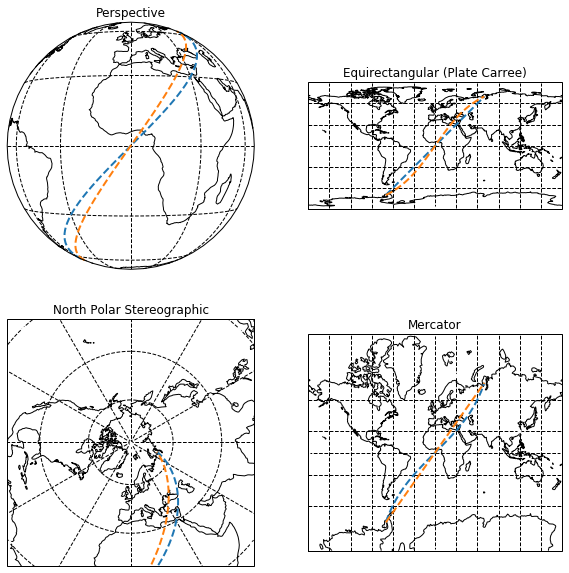

In [86]:
def drw_grid(subplot, projection, lw=1, dlon=30, dlat=30):
    ax=plt.subplot(subplot, projection=projection)
    z = numpy.linspace(0,1,128)
    lon0 = -int(180/dlon)*dlon
    for lon in range(lon0, 181, dlon):
        ax.plot(lon+0*z,-89+178*z,'k--',transform=cartopy.crs.PlateCarree(),linewidth=lw)
    lat0 = -int(89/dlon)*dlon
    for lat in range(lat0, 90, dlat):
        ax.plot(-180+360*z,lat+0*z,'k--',transform=cartopy.crs.PlateCarree(),linewidth=lw)
    ax.plot([-180,180,0,0],[0,0,89,-89],'w.',transform=cartopy.crs.PlateCarree())
    ax.coastlines()
    drw_lines(ax)
plt.figure(figsize=(10,10))
drw_grid(221, cartopy.crs.NearsidePerspective() ); plt.title('Perspective')
drw_grid(222, cartopy.crs.PlateCarree() ); plt.title('Equirectangular (Plate Carree)')
drw_grid(223, cartopy.crs.NorthPolarStereo() ); plt.title('North Polar Stereographic')
w = 1e7; plt.xlim(-w,w); plt.ylim(-w,w)
drw_grid(224, cartopy.crs.Mercator() ); plt.title('Mercator')

plt.tight_layout()